Objective:

Use topic model to map and label transaction data into various categories.


Our dataset contain 176 rows and for we to get a better mapping or topic, we need a corpus more than what we have. 


So, therefore, we will use just three categories for this project and as we get more dataset, we will product more topics.


**Selected topics:**
- Online transactions
- Charges
- Others



**Steps:**
- Data cleaning
- data preprocessing
- BERT Topic mode
- Guided Bert Topic Model
- Guided LDA model
- Evaluation 
- Save model
- Topic mapping for auto labelling
- Vectorization for Baseline Classifier
- Baseline Classifier training and export model
- Baseline model sample prediciton 

In [ ]:
pip install bertopic flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 5.3 MB/s 
     |████████████████████████████████| 401 kB 15.7 MB/s 
     |████████████████████████████████| 85 kB 5.6 MB/s 
     |████████████████████████████████| 88 kB 8.8 MB/s 
     |████████████████████████████████| 636 kB 42.3 MB/s 
     |████████████████████████████████| 5.2 MB 40.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.5 MB 33.1 MB/s 
     |████████████████████████████████| 1.3 MB 24.0 MB/s 
     |████████████████████████████████| 163 kB 50.2 MB/s 
     |████████████████████████████████| 7.6 MB 42.3 MB/s 
     |████████████████████████████████| 1.1 MB 56.5 MB/s 
     |████████████████████████████████| 1.2 MB 68.3 MB/s 
     |████████████████████████████████| 788 kB 64.1 MB/s 
     |█████████████████████

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install bertopic[visualization]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install wordsegment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.8 MB 6.8 MB/s 


In [ ]:
import pandas as pd 
import string
import numpy as np
from bertopic import BERTopic
from wordsegment import load, segment,clean
load()
import re

In [ ]:
df = pd.read_csv("train.csv")

# Data Cleaning 

In [ ]:
#import re
regex = re.compile('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""))

#remove digit
# using translate and digits
# to remove numeric digits from string
def remove_digit(text):
  """
  remove digit from text

  Args:
      _type: str

  Returns:
      _type_: str
      return clean text without noise
  """
  
  remove_digits = str.maketrans('', '', string.digits)
  res = text.translate(remove_digits)
  return res



#remove unigram and bigram


def remove_bigram_unigram(text):
  
  """
  remove bigram and unigram from text
  reason: most big gram and unigram are noise

  Args:
      _type: str

  Returns:
      _type_: str
      return clean text without noise
  """
  result = ' '.join(word for word in text.split() if len(word)>2)
  return result
#remove puntunction
def remove_puntucations_from_text(s):
  """remove puntucations from text using regex

  Args:
      _type: str

  Returns:
      _type_: str
      return clean text without punctuations
  """
  return regex.sub(' ', s)


#run word segment

def segment_word(text):
  """segment words joined together 
  e.g paymentforgame return ["payment for game"]

  Args:
      _type: str

  Returns:
      _type_: str
      return segemented words
  """
  
  result = segment(text)
  return " ".join(result)



#remove xxx from str
def remove_xxxx(text):
  """ remove xxx from data

  Args:
      _type_:str

  Returns:
      _type_:str
      return clean date value
  """
  try:
    return "".join([re.sub("x+",'',x) for x in text])
  except:
    pass


In [ ]:
#convert text to str
df['PARTICULARS'] = df['PARTICULARS'].str.lower()


#apply cleaning functions to dataset
df['PARTICULARS'] = df['PARTICULARS'].apply(remove_puntucations_from_text)\
                                     .apply(remove_digit)\
                                     .apply(remove_xxxx)\
                                     .apply(remove_bigram_unigram)


#check for null values
df.isnull().sum()


TRANSACTION DATE      0
PARTICULARS           0
WITHDRAWAL AMT       20
DEPOSIT AMT         156
BALANCE AMT           0
dtype: int64

# BERT Topic model and topic labelling

In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sentence_transformers import SentenceTransformer

#use sentence embedding for topic clustering
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")


In [ ]:
# create model 
 
model = BERTopic(verbose=True,nr_topics = 3, embedding_model=sentence_model,diversity=0.8,)
 
#convert to list 


docs = df.PARTICULARS.to_list()
 
topics, probabilities = model.fit_transform(docs)

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

2022-11-09 15:27:20,407 - BERTopic - Transformed documents to Embeddings
2022-11-09 15:27:30,127 - BERTopic - Reduced dimensionality
2022-11-09 15:27:30,148 - BERTopic - Clustered reduced embeddings
2022-11-09 15:27:32,291 - BERTopic - Reduced number of topics from 5 to 4


In [ ]:
model.get_topic_freq()

,Topic,Count
0,0,92
1,1,48
2,-1,18
3,2,18


In [ ]:
model.get_topic(2)

[('aster', 0.3251259086534586),
 ('medicity', 0.3251259086534586),
 ('pos', 0.2907099806895017),
 ('sakra', 0.09736069821557268),
 ('deb', 0.09071653303387651),
 ('hair', 0.06147937263192002),
 ('apollo', 0.06147937263192002),
 ('care', 0.06147937263192002),
 ('and', 0.05338778160346637),
 ('ebit', 0.040711928927277354)]

In [ ]:
#topic labelling

Topic_0 = "online transaction"
Topic_1 = "charges"
Topic_2 = "others"


In [ ]:
model.visualize_barchart()

In [ ]:
model.visualize_heatmap()

In [ ]:
#new prediction
topics, probs = model.transform("pos easy day pos debit")
topics

#from our result, we can see that this transaction below to topic 0 which is online transaction

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2022-11-09 15:27:40,311 - BERTopic - Reduced dimensionality
2022-11-09 15:27:40,317 - BERTopic - Predicted clusters


[0]

From this operation or model, we notice that an error using bert topic which  assign same word to various topic and one way we can eliminate this is by using a guided or semi supervised apporach and this will in turn improve our model

# Guided topic model for BERT topic

In [ ]:
#guided word

online_transactions = ['pos', 'debit', 'pay','com', "payment"]
others = ['rent']
charges = ['charges', 'neft', "commission", "tax"]

seed_topic_list = [online_transactions,others,charges]

model = BERTopic(verbose=True,nr_topics = 3, embedding_model=sentence_model,diversity=0.6,seed_topic_list=seed_topic_list)
 
#convert to list 



docs = df.PARTICULARS.to_list()
 
topics, probabilities = model.fit_transform(docs)

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

2022-11-09 15:27:41,640 - BERTopic - Transformed documents to Embeddings


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2022-11-09 15:27:46,156 - BERTopic - Reduced dimensionality
2022-11-09 15:27:46,175 - BERTopic - Clustered reduced embeddings
2022-11-09 15:27:48,530 - BERTopic - Reduced number of topics from 5 to 4


In [ ]:
model.visualize_barchart()

In [ ]:
model.visualize_heatmap()

lets benchmark our guided bert topic model with Lda

# Using Guided LDA (Semi surpervised Algorithm)

In [ ]:
pip install lda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 351 kB 7.7 MB/s 
     |████████████████████████████████| 99 kB 9.6 MB/s 


In [ ]:
import os
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk import word_tokenize
import numpy as np
from gensim.models.ldamulticore import LdaMulticore
import gensim
from gensim import corpora

In [ ]:



docs = df.PARTICULARS.to_numpy()

dataset = [d.split() for d in docs]
# create dictionary of all words in all documents
common_dictionary = corpora.Dictionary(dataset)




# # filter extreme cases out of dictionary
common_dictionary.filter_extremes(no_below=1)

# create BOW dictionary
bow_corpus = [common_dictionary.doc2bow(doc) for doc in dataset]





In [ ]:
#guided words
online_transactions = ['pos', 'debit', 'pay','com','payment',]
others = ['rent']
charges = ['charges', 'neft', "commission", "tax"]


In [ ]:
seed_topics = {}
for word in online_transactions:
    seed_topics[word] = 0
for word in others:
    seed_topics[word] = 1
for word in charges:
    seed_topics[word] = 2

#create eta
def create_eta(priors, etadict, ntopics):
    eta = np.full(shape=(ntopics, len(etadict)), fill_value=1) # create a (ntopics, nterms) matrix and fill with 1
    for word, topic in priors.items(): # for each word in the list of priors
        keyindex = [index for index,term in etadict.items() if term==word] # look up the word in the dictionary
        if (len(keyindex)>0): # if it's in the dictionary
            eta[topic,keyindex[0]] = 1e7  # put a large number in there
    eta = np.divide(eta, eta.sum(axis=0)) # normalize so that the probabilities sum to 1 over all topics
    return eta

In [ ]:
eta = create_eta(seed_topics, common_dictionary, 3)
eta

In [ ]:
#run lda model

lda_model = LdaMulticore(corpus=bow_corpus,
                         id2word=common_dictionary,
                         num_topics=3,
                         eta=eta,
                         chunksize=200,
                         passes=5,
                         random_state=32,
                         alpha='symmetric',
                         per_word_topics=True)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning:

divide by zero encountered in log



In [ ]:
for num, params in lda_model.print_topics():
    print(f'{num}: {params}\n')

0: 0.115*"debit" + 0.028*"medicity" + 0.028*"aster" + 0.019*"credit" + 0.019*"interest" + 0.016*"neft" + 0.015*"upi" + 0.015*"owner" + 0.015*"krishnaji" + 0.013*"rama"

1: 0.151*"debit" + 0.036*"com" + 0.033*"itunes" + 0.031*"bill" + 0.027*"bangalore" + 0.026*"nwd" + 0.017*"westside" + 0.011*"aadhaar" + 0.011*"updation" + 0.011*"service"

2: 0.049*"upi" + 0.024*"medplus" + 0.024*"optival" + 0.023*"ebit" + 0.021*"paytmwalletloading" + 0.019*"uber" + 0.018*"neft" + 0.017*"debit" + 0.016*"okicici" + 0.015*"phdf"



# Evaluation

In [ ]:

from gensim.models import CoherenceModel
# Compute Coherence Score for Guided lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=dataset, dictionary=common_dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.6191781049361903


In [ ]:
#coherence score for guided BErt Topic

coherence_model_lda = CoherenceModel(model=model, texts=dataset, dictionary=common_dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  1.0


Coherence Metric assesses is how well a topic is ‘supported’ by a text set. 

From the above score, we can deduce that our Guided BERT topic coherence score perfom better that the Gudied LDA.

PS: The higher the better (0<X<1)


# Save Models

In [ ]:
#save model
model.save("my_topics_model")

In [ ]:
#load model
BerTopic_model = BERTopic.load("my_topics_model")

# Auto label data with topics 

The main objective of the topic model is to assist label the dataset into various ctegory and we mention earlier that becuase we don't a large dataset, we will utilize only three categories and as we get more dataset, we will add more categories or topics.

In this section, we will map the topic to the dataset and assign each text to a label. we will mapt the online transaction and charges while every other dataset will automatically be assigned to others category

In [ ]:
#for we to build a classifer, we need to map the keywords in each topic to the document that we have.

topic_list = []
for x in range(3):
  get_topics = model.get_topic(x)
  dict_topic = dict(get_topics)
  d = dict((k, v) for k, v in dict_topic.items() if v >= 0.04)
  topic_list.append(list(d.keys()))



train_data_label = pd.DataFrame(["online_transactions", "charges", "others"], columns = ["label"])
train_data_label['topics'] = topic_list


In [ ]:
# checking if string contains list element
def map_topics_online_trans(text):
  on_list = train_data_label.loc[train_data_label['label'] == "online_transactions"]['topics'].values
  crg_list = train_data_label.loc[train_data_label['label'] == "charges"]['topics'].values
  res_on = [ele for ele in on_list[0] if(ele in text)]
  res_chrg = [ele for ele in crg_list[0] if(ele in text)]
  if len(res_on)>=1:
    return "online_transactions"
  if len(res_chrg)>=1:
    return "charges"
  else:
    pass
  



df['label'] = df['PARTICULARS'].apply(map_topics_online_trans)
#fill in the remaining values with others
df['label'] = df['label'].fillna("others")


In [ ]:
df['label'].value_counts()

online_transactions    84
others                 62
charges                30
Name: label, dtype: int64

# Baseline Classifier with generated topics 

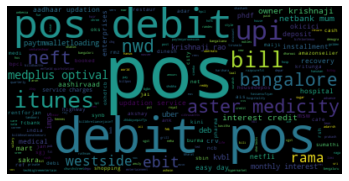

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Start with one review:

xx = []
for i in df['PARTICULARS']:
    xx.append(i)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(",".join(xx))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #Import Count Vectorizer
from sklearn.model_selection import train_test_split #Cross Validation 

cv = CountVectorizer()
tfid = TfidfVectorizer()

data = df[['PARTICULARS','label']]
train, valid = train_test_split(data, test_size=0.2) #split train and valid set 80/20


train_set= cv.fit_transform(train['PARTICULARS'])
train_tag = train['label']
valid_set= cv.transform(valid['PARTICULARS'])
valid_tag = valid['label']



vocab = cv.get_feature_names()

In [ ]:
from sklearn.linear_model import SGDClassifier
clf2 = SGDClassifier(max_iter=5,random_state=20,n_jobs=50, average = True, power_t =2, n_iter_no_change =1)
clf2.fit(train_set, train_tag)

SGDClassifier(average=True, max_iter=5, n_iter_no_change=1, n_jobs=50,
              power_t=2, random_state=20)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:

sgd_train = clf2.predict(train_set)

print('Train accuracy = {}'.format(
        accuracy_score(sgd_train , train_tag) * 100)
     )
f1_score = metrics.f1_score(sgd_train, train_tag, average='macro')
print(' F1 Train classification score: {}'.format(f1_score* 100))

sgd_test= clf2.predict(valid_set)

print('Test accuracy = {}'.format(
        accuracy_score(sgd_test, valid_tag) * 100)
     )
f1_score = metrics.f1_score(sgd_test, valid_tag, average='macro')
print(' F1 Test classification score: {}'.format(f1_score* 100))

Train accuracy = 100.0
 F1 Train classification score: 100.0
Test accuracy = 100.0
 F1 Test classification score: 100.0


In [ ]:
import pickle
from joblib import dump, load 


#save vocabulary 
dump(vocab, "vocab.joblib.dat")
dump(clf2, "model.joblib.dat")



['model.joblib.dat']

# Test with a custom dataset

In [ ]:

from joblib import dump
from joblib import load
from sklearn.feature_extraction.text import CountVectorizer 

modelpath = 'model.joblib.dat'
vocabpath = 'vocab.joblib.dat'
vocab = load(vocabpath)
loaded_model = load(modelpath)


cv = CountVectorizer(min_df=0, lowercase=True,vocabulary = vocab)

custom = 'POS 541919XXXXXX4335 EASY DAY POS DEBIT'
custom = custom.lower()


text = remove_bigram_unigram(remove_xxxx(remove_digit(remove_puntucations_from_text(custom))))

pred_text = cv.transform([text])

In [ ]:

prediction_random= loaded_model.predict(pred_text)
prediction_random

array(['online_transactions'], dtype='<U19')

# Future Work

From the above metrics and operation, we can see that one of the limitation we have is dataset, and there are other steps we can do to improve our baseline models



**Which are;**
- Intensive evaluation and testing for topic models
- Hyper parameter tunning for topic models and classifier
- Utilizing Semi Supervise strategy 
- Using word2vec for classification model
